<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-k-armed-Bandit-Problem" data-toc-modified-id="A-k-armed-Bandit-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A k-armed Bandit Problem</a></span></li><li><span><a href="#Action-value-methods" data-toc-modified-id="Action-value-methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Action-value methods</a></span></li><li><span><a href="#The-10-armed-Testbed" data-toc-modified-id="The-10-armed-Testbed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The 10-armed Testbed</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Greedy-Agent" data-toc-modified-id="Greedy-Agent-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Greedy Agent</a></span></li><li><span><a href="#$\epsilon$-greedy-Agent" data-toc-modified-id="$\epsilon$-greedy-Agent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>$\epsilon$-greedy Agent</a></span></li><li><span><a href="#Averaging-runs" data-toc-modified-id="Averaging-runs-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Averaging runs</a></span></li><li><span><a href="#Comparing-values-of-$\epsilon$" data-toc-modified-id="Comparing-values-of-$\epsilon$-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparing values of $\epsilon$</a></span></li><li><span><a href="#The-Effect-of-Step-Size" data-toc-modified-id="The-Effect-of-Step-Size-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>The Effect of Step Size</a></span></li></ul></li><li><span><a href="#Incremental-Implementation" data-toc-modified-id="Incremental-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Incremental Implementation</a></span></li><li><span><a href="#Tracking-a-Nonstationary-Problem" data-toc-modified-id="Tracking-a-Nonstationary-Problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tracking a Nonstationary Problem</a></span></li><li><span><a href="#Optimistic-Initial-Values" data-toc-modified-id="Optimistic-Initial-Values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Optimistic Initial Values</a></span></li><li><span><a href="#Upper-Confidence-Bound-Action-selection" data-toc-modified-id="Upper-Confidence-Bound-Action-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Upper-Confidence-Bound Action selection</a></span></li></ul></div>

# Multi-armed bandits

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Summary of chapter 2 of Reinforcement Learning by Sutton and Barto.

The most important feature distinguishing reinforcement learning from other types of
learning is that it uses training information that evaluates the actions taken rather
than instructs by giving correct actions.

To start the study of reinforcement learning, the problem that we explore is a simple version of the k-armed bandit problem.

## A k-armed Bandit Problem

Consider the following learning problem. You are faced repeatedly with a choice among
k di↵erent options, or actions. After each choice you receive a numerical reward chosen
from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example,
over 1000 action selections, or time steps.

In our k-armed bandit problem, each of the k actions has an expected or mean reward
given that that action is selected; let us call this the value of that action. We denote the
action selected on time step $t$ as $A_t$, and the corresponding reward as $R_t$. The value then
of an arbitrary action $a$, denoted $q_*(a)$, is the expected reward given that $a$ is selected:

$$ q_*(a)=\mathbb{E}[R_t|A_t=a] $$

We assume that you do not know the action values with certainty, although you may have estimates. We denote the estimated value of action $a$ at time step $t$ as $Q_t(a)$. We would like $Q_t(a)$ to be close to $q_*(a)$.

If you maintain estimates of the action values, then at any time step there is at least
one action whose estimated value is greatest. We call these the greedy actions. When you
select one of these actions, we say that you are exploiting your current knowledge of the
values of the actions. If instead you select one of the nongreedy actions, then we say you
are exploring, because this enables you to improve your estimate of the nongreedy action’s
value. Exploitation is the right thing to do to maximize the expected reward on the one
step, but exploration may produce the greater total reward in the long run. Because it is not possible both to
explore and to exploit with any single action selection, one often refers to the “conflict”
between exploration and exploitation.

## Action-value methods

We begin by looking more closely at methods for estimating the values of actions and
for using the estimates to make action selection decisions, which we collectively call
action-value methods. Recall that the true value of an action is the mean reward when
that action is selected. One natural way to estimate this is by averaging the rewards
actually received:

$$ Q_t(a)=\frac{\sum_{i=1}^{t-1}R_i \mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_i=a}} $$

Where $\mathbb{1}_{predicate}$ denotes the random variable that is 1 if predicate is true and 0 if it is not. The simplest action selection rule is to select one of the actions with the highest
estimated value, that is, one of the greedy actions as defined in the previous section.
If there is more than one greedy action, then a selection is made among them in some
arbitrary way, perhaps randomly. We write this greedy action selection method as

$$ A_t = argmax_a Q_t(a) $$

Greedy action selection always exploits current
knowledge to maximize immediate reward; it spends no time at all sampling apparently
inferior actions to see if they might really be better. A simple alternative is to behave
greedily most of the time, but every once in a while, say with small probability $\epsilon$, instead select randomly from among all the actions with equal probability, independently of
the action-value estimates. We call methods using this near-greedy action selection rule
$\epsilon$-greedy methods.

An advantage of these methods is that, in the limit as the number of
steps increases, every action will be sampled an infinite number of times, thus ensuring
that all the $Q_t(a)$ converge to $q_*(a)$. This of course implies that the probability of selecting
the optimal action converges to greater than $1-\epsilon$, that is, to near certainty.

## The 10-armed Testbed

### Introduction

To roughly assess the relative e↵ectiveness of the greedy and "-greedy action-value
methods, we compared them numerically on a suite of test problems. 

This was a set
of 2000 randomly generated k-armed bandit problems with k = 10. For each bandit
problem, such as the one shown in the next figure, the action values, $q_*(a)$, a = 1, . . . , 10, were selected according to a normal (Gaussian) distribution with mean 0 and variance 1.
Then, when a learning method applied to that problem selected action $A_t$ at time step t,
the actual reward, $R_t$, was selected from a normal distribution with mean $q_*(a)$ and
variance 1.

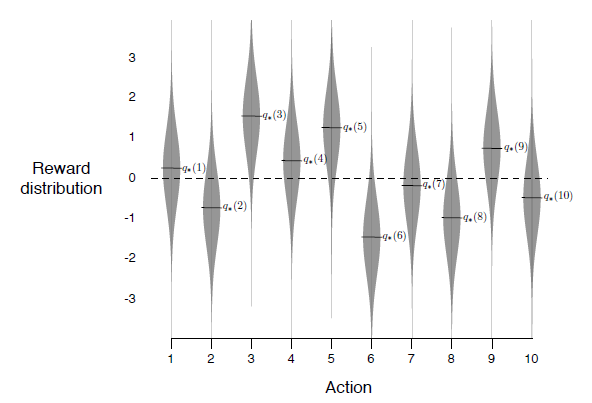

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reinforcement_learning.alberta.rl_glue import RLGlue
from reinforcement_learning.alberta import main_agent
from reinforcement_learning.alberta import ten_arm_env
from reinforcement_learning.alberta import test_env
from tqdm import tqdm, tqdm_notebook
import time

### Greedy Agent

In [2]:
def argmax(q_values):
    top = float("-inf")
    ties = []
    for i in range(len(q_values)):
        if q_values[i]>top:
            top = q_values[i]
            ties = [i]
        if q_values[i]==top:
            ties.append(i)
    top = np.random.choice(ties)
    return top 


class GreedyAgent(main_agent.Agent):
    def agent_step(self, reward, observation):
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] = self.q_values[self.last_action] + 1/self.arm_count[self.last_action]*(reward-self.q_values[self.last_action])
        current_action = argmax(self.q_values)
        self.last_action = current_action
        return current_action

100%|█████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.96it/s]


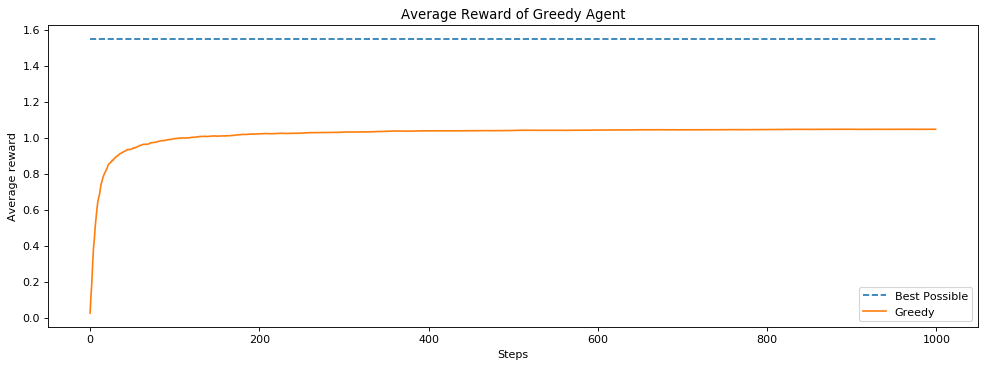

In [5]:
num_runs = 200                  
num_steps = 1000                  
env = ten_arm_env.Environment     
agent = GreedyAgent               
agent_info = {"num_actions": 10}                         
env_info = {}                     
all_averages = []

for i in tqdm(range(num_runs), ncols=100):           
    rl_glue = RLGlue(env, agent)          
    rl_glue.rl_init(agent_info, env_info) 
    rl_glue.rl_start()                    

    scores = [0]
    averages = []
    
    for i in range(num_steps):
        reward, _, action, _ = rl_glue.rl_step() 
        scores.append(scores[-1] + reward)
        averages.append(scores[-1] / (i + 1))
    all_averages.append(averages)

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([1.55 for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(all_averages, axis=0))
plt.legend(["Best Possible", "Greedy"])
plt.title("Average Reward of Greedy Agent")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()
greedy_scores = np.mean(all_averages, axis=0)
np.save("greedy_scores", greedy_scores)

### $\epsilon$-greedy Agent

In [6]:
class EpsilonGreedyAgent(main_agent.Agent):
    def agent_step(self, reward, observation):
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] = self.q_values[self.last_action] + 1/self.arm_count[self.last_action]*(reward-self.q_values[self.last_action])
        current_action = argmax(self.q_values)
        random_number = np.random.random()
        if random_number<self.epsilon:
            current_action = np.random.choice(range(len(self.q_values)))
        self.last_action = current_action
        return current_action

100%|█████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 28.07it/s]


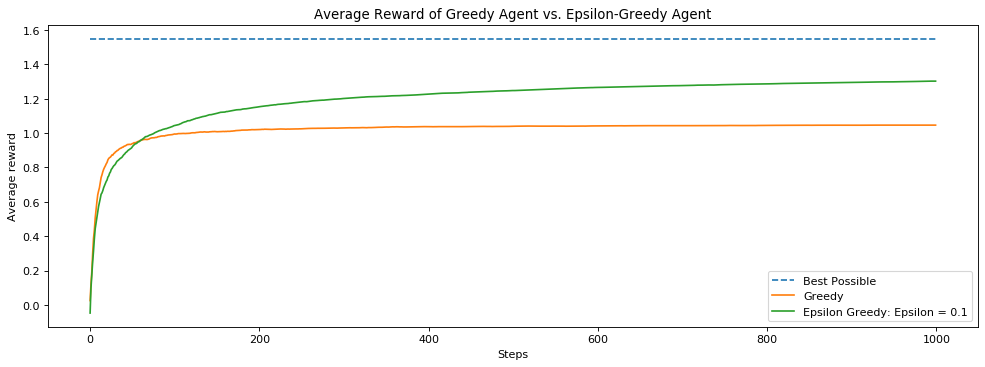

In [8]:
num_runs = 200
num_steps = 1000
epsilon = 0.1
agent = EpsilonGreedyAgent
env = ten_arm_env.Environment
agent_info = {"num_actions": 10, "epsilon": epsilon}
env_info = {}
all_averages = []

for i in tqdm(range(num_runs), ncols=100):
    rl_glue = RLGlue(env, agent)
    rl_glue.rl_init(agent_info, env_info)
    rl_glue.rl_start()

    scores = [0]
    averages = []
    for i in range(num_steps):
        reward, _, action, _ = rl_glue.rl_step() 
        scores.append(scores[-1] + reward)
        averages.append(scores[-1] / (i + 1))
    all_averages.append(averages)

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([1.55 for _ in range(num_steps)], linestyle="--")
plt.plot(greedy_scores)
plt.title("Average Reward of Greedy Agent vs. Epsilon-Greedy Agent")
plt.plot(np.mean(all_averages, axis=0))
plt.legend(("Best Possible", "Greedy", "Epsilon Greedy: Epsilon = 0.1"))
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()
np.save("e-greedy", all_averages)

### Averaging runs

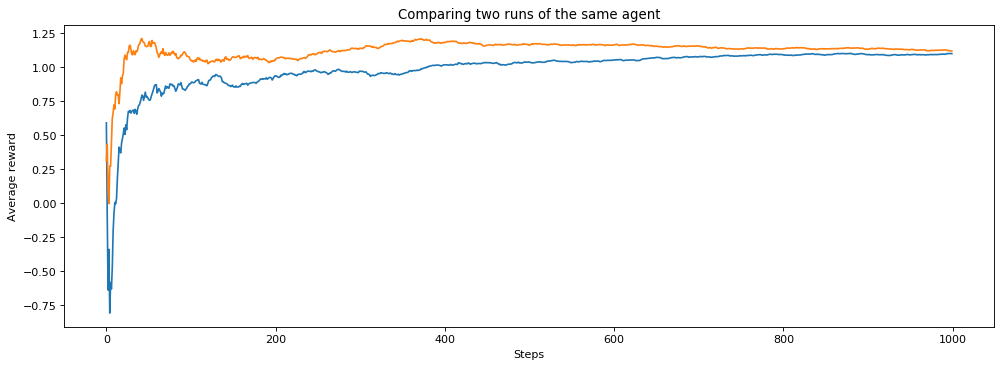

In [11]:
agent = EpsilonGreedyAgent
agent_info = {"num_actions": 10, "epsilon": 0.1}
env_info = {}
all_averages = []
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
num_steps = 1000

for run in (0, 1):
    np.random.seed(run) 
    averages = []
    rl_glue = RLGlue(env, agent)
    rl_glue.rl_init(agent_info, env_info)
    rl_glue.rl_start()
    scores = [0]
    for i in range(num_steps):
        reward, state, action, is_terminal = rl_glue.rl_step()
        scores.append(scores[-1] + reward)
        averages.append(scores[-1] / (i + 1))
    plt.plot(averages)
plt.title("Comparing two runs of the same agent")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

### Comparing values of $\epsilon$

100%|█████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 20.35it/s]


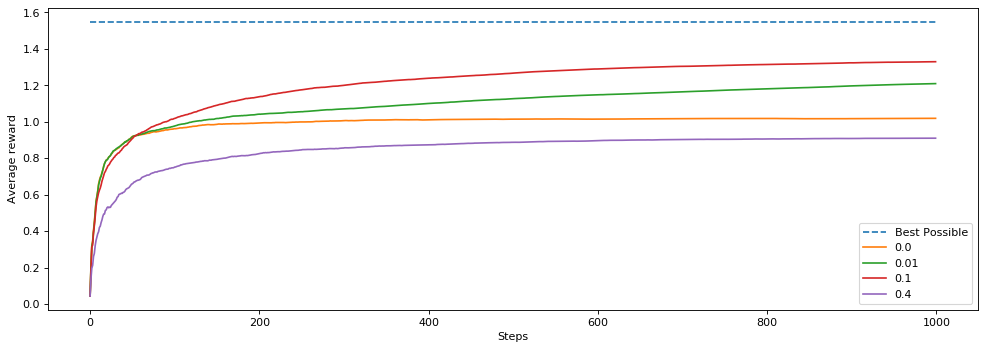

In [13]:
epsilons = [0.0, 0.01, 0.1, 0.4]

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([1.55 for _ in range(num_steps)], linestyle="--")

n_q_values = []
n_averages = []
n_best_actions = []

num_runs = 200

for epsilon in epsilons:
    all_averages = []
    for run in tqdm(range(num_runs), ncols=100):
        agent = EpsilonGreedyAgent
        agent_info = {"num_actions": 10, "epsilon": epsilon}
        env_info = {"random_seed": run}

        rl_glue = RLGlue(env, agent)
        rl_glue.rl_init(agent_info, env_info)
        rl_glue.rl_start()
        
        best_arm = np.argmax(rl_glue.environment.arms)

        scores = [0]
        averages = []
        best_action_chosen = []
        
        for i in range(num_steps):
            reward, state, action, is_terminal = rl_glue.rl_step()
            scores.append(scores[-1] + reward)
            averages.append(scores[-1] / (i + 1))
            if action == best_arm:
                best_action_chosen.append(1)
            else:
                best_action_chosen.append(0)
            if epsilon == 0.1 and run == 0:
                n_q_values.append(np.copy(rl_glue.agent.q_values))
        if epsilon == 0.1:
            n_averages.append(averages)
            n_best_actions.append(best_action_chosen)
        all_averages.append(averages)
        
    plt.plot(np.mean(all_averages, axis=0))
plt.legend(["Best Possible"] + epsilons)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()

### The Effect of Step Size

In [14]:
class EpsilonGreedyAgentConstantStepsize(main_agent.Agent):
    def agent_step(self, reward, observation):
        self.arm_count[self.last_action] += 1
        self.q_values[self.last_action] = self.q_values[self.last_action] + self.step_size*(reward-self.q_values[self.last_action])
        current_action = argmax(self.q_values)
        random_number = np.random.random()
        if random_number<self.epsilon:
            current_action = np.random.choice(range(len(self.q_values)))
        self.last_action = current_action
        
        return current_action

100%|█████████████████████| 200/200 [00:08<00:00, 23.25it/s]


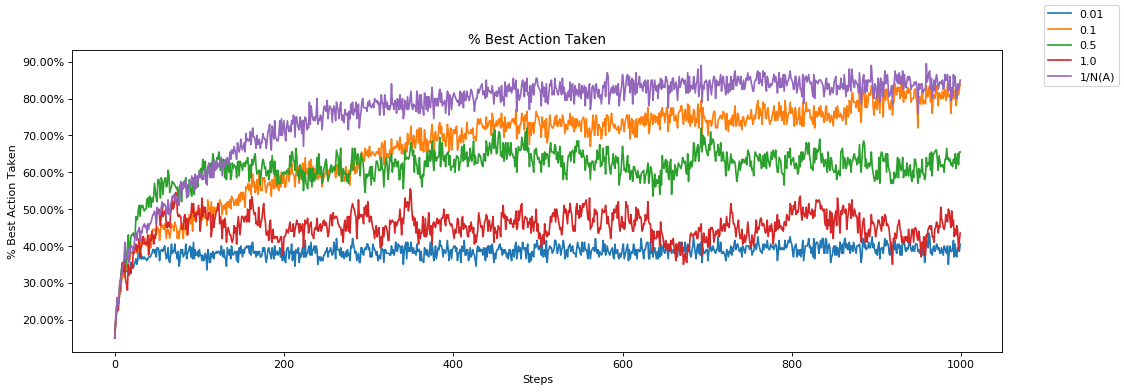

In [15]:
step_sizes = [0.01, 0.1, 0.5, 1.0]
epsilon = 0.1
num_steps = 1000
num_runs = 200

fig, ax = plt.subplots(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

q_values = {step_size: [] for step_size in step_sizes}
true_values = {step_size: None for step_size in step_sizes}
best_actions = {step_size: [] for step_size in step_sizes}

for step_size in step_sizes:
    all_averages = []
    for run in tqdm(range(num_runs), ncols=60):
        agent = EpsilonGreedyAgentConstantStepsize
        agent_info = {"num_actions": 10, "epsilon": epsilon, "step_size": step_size, "initial_value": 0.0}
        env_info = {"random_seed": run}

        rl_glue = RLGlue(env, agent)
        rl_glue.rl_init(agent_info, env_info)
        rl_glue.rl_start()
        
        best_arm = np.argmax(rl_glue.environment.arms)

        scores = [0]
        averages = []
        
        if run == 0:
            true_values[step_size] = np.copy(rl_glue.environment.arms)
            
        best_action_chosen = []
        for i in range(num_steps):
            reward, state, action, is_terminal = rl_glue.rl_step()
            scores.append(scores[-1] + reward)
            averages.append(scores[-1] / (i + 1))
            if action == best_arm:
                best_action_chosen.append(1)
            else:
                best_action_chosen.append(0)
            if run == 0:
                q_values[step_size].append(np.copy(rl_glue.agent.q_values))
        best_actions[step_size].append(best_action_chosen)
    ax.plot(np.mean(best_actions[step_size], axis=0))
    if step_size == 0.01:
        np.save("step_size", best_actions[step_size])
    
ax.plot(np.mean(n_best_actions, axis=0))
fig.legend(step_sizes + ["1/N(A)"])
plt.title("% Best Action Taken")
plt.xlabel("Steps")
plt.ylabel("% Best Action Taken")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

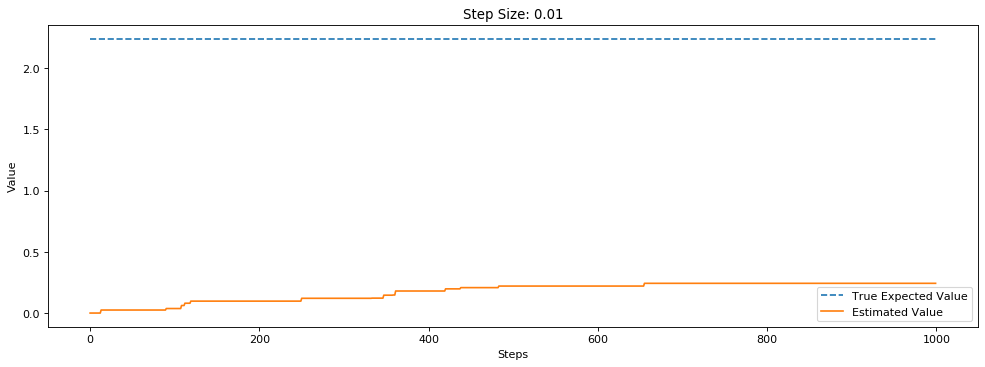

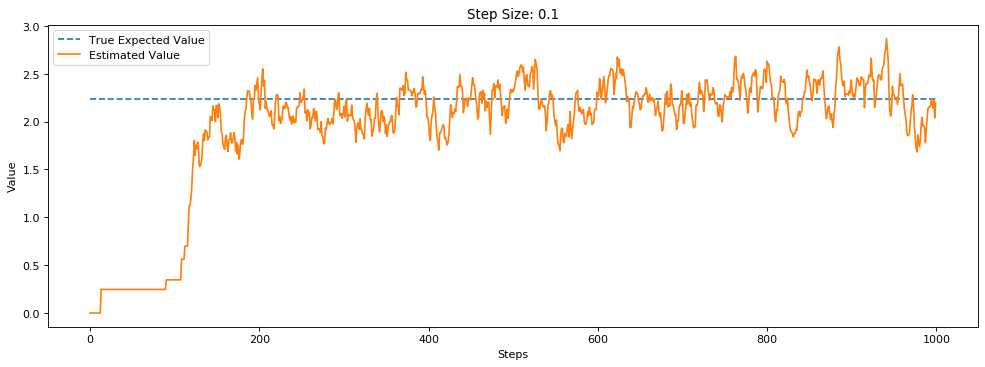

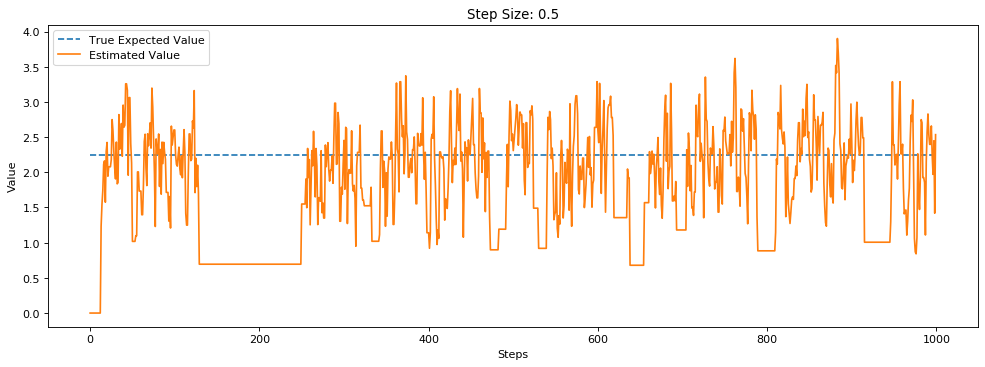

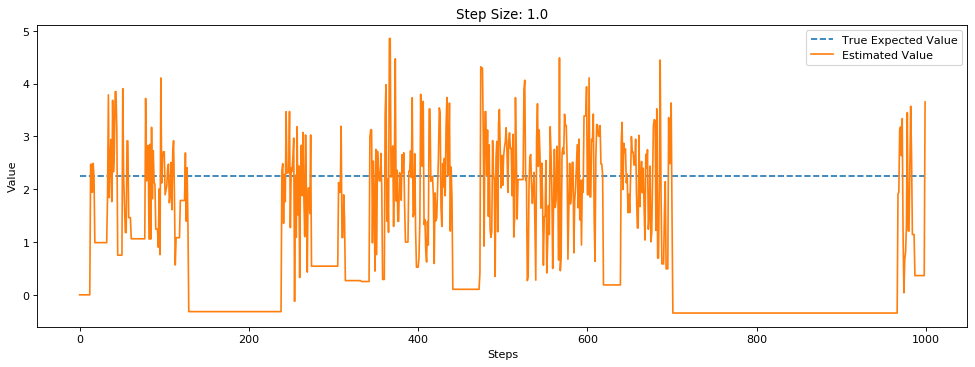

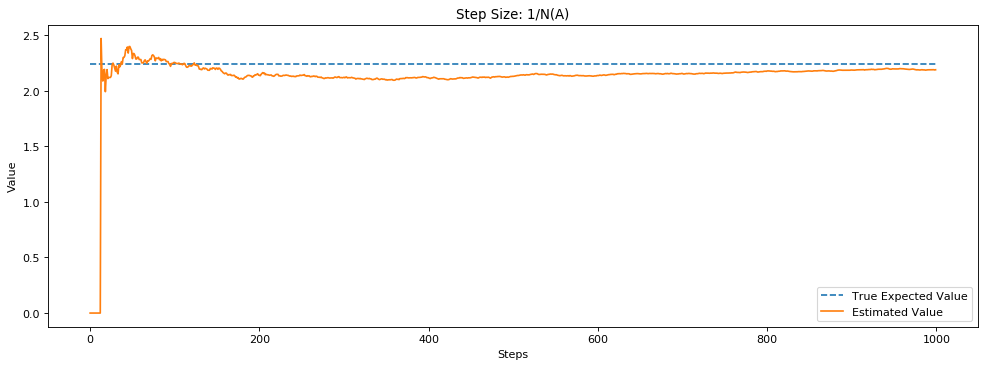

In [17]:
largest = 0
num_steps = 1000
for step_size in step_sizes:
    plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
    largest = np.argmax(true_values[step_size])
    plt.plot([true_values[step_size][largest] for _ in range(num_steps)], linestyle="--")
    plt.title("Step Size: {}".format(step_size))
    plt.plot(np.array(q_values[step_size])[:, largest])
    plt.legend(["True Expected Value", "Estimated Value"])
    plt.xlabel("Steps")
    plt.ylabel("Value")
    plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Step Size: 1/N(A)")
plt.plot([true_values[step_size][largest] for _ in range(num_steps)], linestyle="--")
plt.plot(np.array(n_q_values)[:, largest])
plt.legend(["True Expected Value", "Estimated Value"])
plt.xlabel("Steps")
plt.ylabel("Value")
plt.show()

## Incremental Implementation

The action-value methods we have discussed so far all estimate action values as sample
averages of observed rewards. We now turn to the question of how these averages can be
computed in a computationally efficient manner, in particular, with constant memory and constant per-time-step computation.
To simplify notation we concentrate on a single action. Let $R_i$ now denote the reward
received after the ith selection of this action, and let $Q_n$ denote the estimate of its action value after it has been selected n − 1 times, which we can now write simply as:

$$Q_n = \frac{R_1+R_2+...+R_{n-1}}{n-1}$$

The obvious implementation would be to maintain a record of all the rewards and then
perform this computation whenever the estimated value was needed. However, if this is
done, then the memory and computational requirements would grow over time as more
rewards are seen. Each additional reward would require additional memory to store it
and additional computation to compute the sum in the numerator.
It is easy to devise incremental
formulas for updating averages with small, constant computation required to process
each new reward. Given Qn and the nth reward, Rn, the new average of all n rewards
can be computed by:

$$ Q_{n+1} = \frac{1}{n}\sum_{i=1}^nR_i = Q_n +\frac{1}{n}[R_n-Q_n] $$

We call the factor $1/n$ the step size, and it is denoted generally as $\alpha$.

Pseudocode for a complete bandit algorithm using incrementally computed sample
averages and $\epsilon$-greedy action selection is shown in the box below. The function bandit(a)
is assumed to take an action and return a corresponding reward.

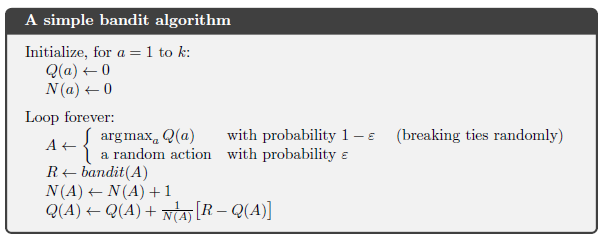

## Tracking a Nonstationary Problem

The averaging methods discussed so far are appropriate for stationary bandit problems,
that is, for bandit problems in which the reward probabilities do not change over time.
As noted earlier, we often encounter reinforcement learning problems that are e↵ectively
nonstationary. In such cases it makes sense to give more weight to recent rewards than
to long-past rewards. One of the most popular ways of doing this is to use a constant
step-size parameter.

We can modify the previous equation to be: 

$$ Q_{n+1} = Q_n +\alpha[R_n-Q_n] $$

This results in $Q_{n+1}$ being a weighted average of past rewards and the initial estimate $Q_1$:

$$ Q_{n+1} = (1-\alpha)^nQ_1+\sum_{i=1}^n\alpha(1-\alpha)^{n-i}R_i$$

The quantity $1-\alpha$ is less than 1, and thus the weight given to $R_i$ decreases as the number of intervening rewards increases. In fact, the weight decays exponentially according to the exponent on $1-\alpha$. Accordingly, this is sometimes called an exponential
recency-weighted average.

## Optimistic Initial Values

All the methods we have discussed so far are dependent to some extent on the initial
action-value estimates. In the language of statistics, these methods are biased
by their initial estimates. The downside is that the
initial estimates become, in effect, a set of parameters that must be picked by the user, if
only to set them all to zero.

The upside is that they provide an easy way to supply some
prior knowledge about what level of rewards can be expected.
Initial action values can also be used as a simple way to encourage exploration. Suppose
that instead of setting the initial action values to zero,we set them all to a value greater 
than the expected reward. This is called "optimistic initial values".

But this optimism encourages action-value methods to explore. Whichever actions are
initially selected, the reward is less than the starting estimates; the learner switches to
other actions, being “disappointed” with the rewards it is receiving. The result is that all
actions are tried several times before the value estimates converge. The system does a
fair amount of exploration even if greedy actions are selected all the time.

## Upper-Confidence-Bound Action selection

Exploration is needed because there is always uncertainty about the accuracy of the
action-value estimates. The greedy actions are those that look best at present, but some of
the other actions may actually be better. $\epsilon$-greedy action selection forces the non-greedy
actions to be tried, but indiscriminately, with no preference for those that are nearly
greedy or particularly uncertain. It would be better to select among the non-greedy
actions according to their potential for actually being optimal, taking into account both
how close their estimates are to being maximal and the uncertainties in those estimates.
One e↵ective way of doing this is to select actions according to:

$$ A_t = argmax_a \bigg[Q_t(a)+c\sqrt{\frac{\log{t}}{N_t(a)}}\bigg] $$

$N_t(a)$ denotes the number of times that action a has been selected prior to time t, and the number c > 0 controls the degree of exploration.

Results with UCB on the 10-armed testbed are shown in the next figure:

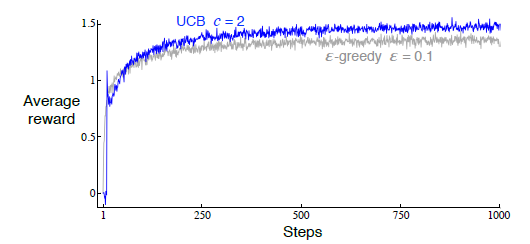